In [14]:
# Import Pandas library
import pandas as pd

# Import the Path module from the pathlib library
from pathlib import Path

# Import the matplotlib inline dependency
%matplotlib inline

In [15]:
amzn_sp500_df = pd.read_csv(
    Path("/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 4/Reading Activities/03-Rolling_Beta_Demo/amzn_sp500_data.csv"), 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the 'amzn_sp500_df' DataFrame with both the 'head' & 'tail' functions
display(amzn_sp500_df.head())
display(amzn_sp500_df.tail())


,AMZN,S&P 500
date,,
2014-05-20,301.19,1872.829956
2014-05-21,305.01,1888.030029
2014-05-22,304.91,1892.489990
2014-05-23,312.24,1900.530029
2014-05-27,310.82,1911.910034


,AMZN,S&P 500
date,,
2019-05-13,1822.68,2811.870117
2019-05-14,1840.12,2834.409912
2019-05-15,1871.15,2850.959961
2019-05-16,1907.57,2876.320068
2019-05-17,1869.00,2859.530029


In [16]:
# Create and review the daily_returns DataFrame for AMZN and the S&P 500
daily_returns = amzn_sp500_df.pct_change().dropna()

# Display the first 5 rows of the DataFrame
daily_returns.head()


,AMZN,S&P 500
date,,
2014-05-21,0.012683,0.008116
2014-05-22,-0.000328,0.002362
2014-05-23,0.024040,0.004248
2014-05-27,-0.004548,0.005988
2014-05-28,-0.002123,-0.001114


<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P 500 Returns'}, xlabel='date'>

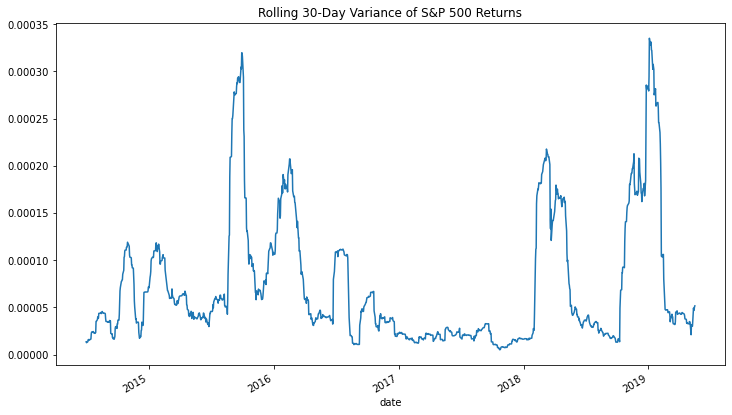

In [17]:
# Calculate the rolling 30 day variance of the S&P 500 (the market)
market_rolling_30_variance = daily_returns['S&P 500'].rolling(window=30).var()

# Create the plot for the S&P 30 day rolling variance
market_rolling_30_variance.plot(
    figsize=(12, 7),
    title='Rolling 30-Day Variance of S&P 500 Returns'
)


<AxesSubplot:title={'center':'Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns'}, xlabel='date'>

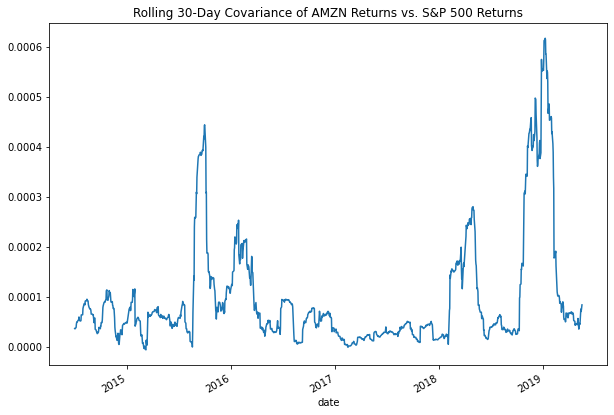

In [22]:
# Calculate the rolling 30-day covariance between AMZN and the S&P 500 (the market)
amzn_rolling_30_covariance = daily_returns["AMZN"].rolling(window=30).cov(daily_returns["S&P 500"])

# Create the plot for AMZN’s 30-day rolling covariance
amzn_rolling_30_covariance.plot(
    figsize=(10, 7),
    title='Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns'
)


<AxesSubplot:title={'center':'AMZN - Rolling 30-Day Beta'}, xlabel='date'>

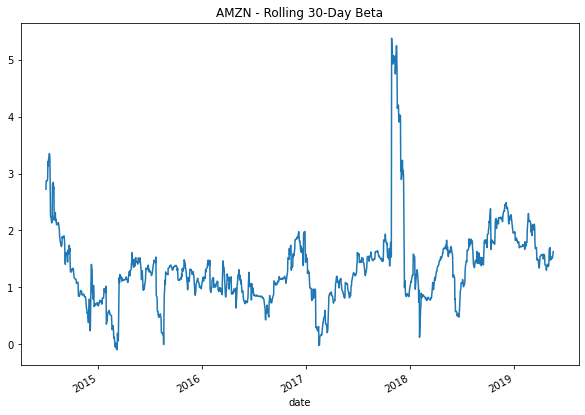

In [23]:
# Calculate the rolling beta by dividing AMZN’s 30-day rolling covariance
# by the 30-day rolling variance of the market
amzn_rolling_30_beta = amzn_rolling_30_covariance / market_rolling_30_variance

# Create the plot for AMZN’s 30-day rolling beta
amzn_rolling_30_beta.plot(
    figsize=(10, 7),
    title='AMZN - Rolling 30-Day Beta'
)
